In [2]:
  # Analyzing-Historical-Stock-Revenue-Data 

!pip install yfinance
#!pip install pandas
#!pip install requests
!pip install bs4
#!pip install plotly
!pip install html5lib
#!pip install html5lib


import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [4]:
#Question 1 - Extracting Tesla Stock Data Using yfinance

Tesla = yf.Ticker("TSLA")
Tesla_info=Tesla.info
Tesla_info


Tesla_data = Tesla.history(period="max")
Tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


In [5]:
#Question 2 - Extracting Tesla Revenue Data Using Webscraping 

url = " https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

soup = BeautifulSoup(html_data,"html5lib")

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
tables = soup.find_all('table')
for index,table in enumerate(tables):
    if ("Tesla Quarterly Revenue" in str(table)):
        table_index = index
Tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Date = col[0].text
        Revenue = col[1].text.replace("$", "").replace(",", "")
        Tesla_revenue = Tesla_revenue .append({"Date":Date, "Revenue":Revenue}, ignore_index=True)
Tesla_revenue = Tesla_revenue[Tesla_revenue['Revenue'] != ""]
Tesla_revenue

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757
5,2021-06-30,11958
6,2021-03-31,10389
7,2020-12-31,10744
8,2020-09-30,8771
9,2020-06-30,6036


In [6]:
Tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [7]:
#Question 3 - Extracting GameStop Stock Data Using yfinance 

GameStop = yf.Ticker("GME")
GameStop_info=GameStop.info
GameStop_info


GameStop_data = GameStop.history(period="max")
GameStop_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [8]:
#Question 4 - Extracting GameStop Revenue Data Using Webscraping

url="https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data= requests.get(url).text

soup = BeautifulSoup(html_data,"html5lib")

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
tables = soup.find_all('table')
for index,table in enumerate(tables):
    if ("GameStop Quarterly Revenue" in str(table)):
        table_index = index
GameStop_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Date = col[0].text
        
        Revenue = col[1].text.replace("$", "").replace(",", "")
        GameStop_revenue = GameStop_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)
        
GameStop_revenue = GameStop_revenue[GameStop_revenue['Revenue'] != ""]
GameStop_revenue
        

,Date,Revenue
0,2022-07-31,1136
1,2022-04-30,1378
2,2022-01-31,2254
3,2021-10-31,1297
4,2021-07-31,1183
5,2021-04-30,1277
6,2021-01-31,2122
7,2020-10-31,1005
8,2020-07-31,942
9,2020-04-30,1021


In [9]:
GameStop_revenue.tail()

,Date,Revenue
50,2010-01-31,3524
51,2009-10-31,1835
52,2009-07-31,1739
53,2009-04-30,1981
54,2009-01-31,3492


<AxesSubplot:xlabel='Date'>

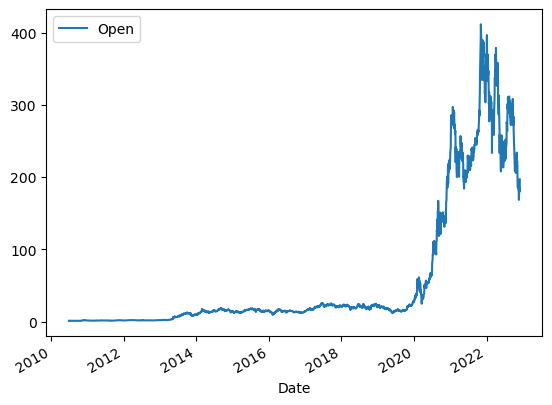

In [11]:
#Question 5 - Tesla Stock and Revenue Dashboard

Tesla_data.reset_index(inplace=True)
Tesla_data.plot(x="Date", y="Open")


In [12]:
make_graph(Tesla_data, Tesla_revenue, 'Tesla Stock Data Graph')

<AxesSubplot:xlabel='Date'>

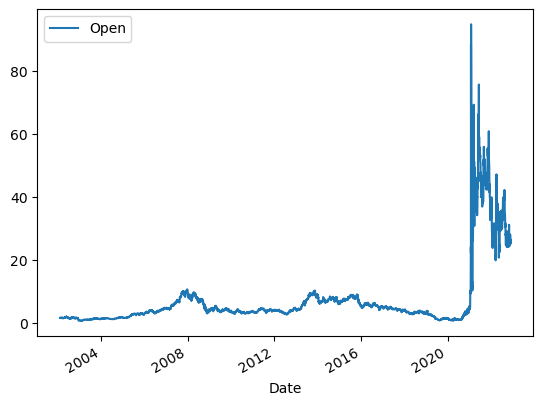

In [13]:
#Question 6 - GameStop Stock and Revenue Dashboard

GameStop_data.reset_index(inplace=True)
GameStop_data.plot(x="Date", y="Open")


In [14]:
make_graph(GameStop_data,GameStop_revenue,'GameStop')